### 목표 설정
1. 선형 분류 모델을 사용해보자.
2. 가설을 세우고 데이터를 분석해서 가설을 검증해보자
3. 분석 결과를 두고, 솔루션을 도출해 보자

In [2]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
url = './data/job_transfer.csv'
try :
    data = pd.read_csv(url)
except FileNotFoundError as e :
    print(f'{e}')

In [4]:
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.shape

(1470, 35)

In [6]:
# 데이터의 형태 파악
data.info()

# 데이터는 integer형과 object 들

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# 데이터 결측치 파악
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [10]:
# 이직률 구하기 - 약 16%

print(f'이직률 : {round(237 / (237 + 1233), 4) * 100}%')

이직률 : 16.12%


In [11]:
# 학습 및 집게를 원활하게 하도록 수치를 변경
# 이직 안 함 : 0,   이직함 : 1
data['Attrition'] = np.where(data['Attrition'] == 'Yes', 1, 0)

In [12]:
data['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [13]:
# 성별 / 연령 분석
# 구간화 기법
data['Age_gp'] = np.where(data['Age'] <= 30, '30 이하',
                         np.where(data['Age'] <= 40, '30~40대', '40대 이상'))

In [14]:
data[['Age_gp', 'Age']]

,Age_gp,Age
0,40대 이상,41
1,40대 이상,49
2,30~40대,37
3,30~40대,33
4,30 이하,27
...,...,...
1465,30~40대,36
1466,30~40대,39
1467,30 이하,27
1468,40대 이상,49


In [15]:
data['Age_gp'].value_counts()

Age_gp
30~40대    619
40대 이상    465
30 이하     386
Name: count, dtype: int64

In [16]:
# 연령별 이직률 현황 파악
df_gp = data.groupby('Age_gp')['Attrition'].agg(['count', 'sum'])
df_gp['radio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

# 나이가 어릴수록 이직율이 높다

,count,sum,radio
Age_gp,,,
30 이하,386,100,25.9
30~40대,619,85,13.7
40대 이상,465,52,11.2


In [17]:
# 성별 이직률 현황
df_gp = data.groupby('Gender')['Attrition'].agg(['count', 'sum'])
df_gp['radio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

# 여성보다 남성의 이직률이 조금이나마 더 높다

,count,sum,radio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [18]:
# 부서별 이직률 현황
df_gp = data.groupby('Department')['Attrition'].agg(['count', 'sum'])
df_gp['radio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

# Sales 부서의 이직률이 가장 높다.

,count,sum,radio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


### 가설 
1. 업무 만족도가 높으면, 이직률이 줄어들 것이다.
2. 인간 관계 만족도가 높으면 이직룰이 줄어들 것이다.

- 두 특성간 연관관게가 있는지 파악해보기

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
# 1. 인간관계 업무 만족도, 이직간의 상관 관계를 파악
# JobSatisfaction : 업무 만족도
# RelationshipSatisfaction : 인관관계 만족도
data[['JobSatisfaction', 'Attrition']].head()

df_gp = data.groupby('JobSatisfaction')['Attrition'].agg(['count', 'sum'])
df_gp['radio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp


,count,sum,radio
JobSatisfaction,,,
1,289,66,22.8
2,280,46,16.4
3,442,73,16.5
4,459,52,11.3


In [22]:
#  
data[['JobSatisfaction', 'RelationshipSatisfaction', 'Attrition']].head()

df_gp = data.groupby(['JobSatisfaction', 'RelationshipSatisfaction'])['Attrition'].agg(['count', 'sum'])
df_gp['radio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

# 업무 만족도가 높은 직원은 인간관계에 따라 이직률의 영향이 거의 없어 보인다.
# 업무 만족도가 낮은 직원은 인간 관계가 나쁠수록 이직률이 상승한다.

count  sum  radio
JobSatisfaction RelationshipSatisfaction                   
1               1                            54   16   29.6
                2                            57   15   26.3
                3                            91   22   24.2
                4                            87   13   14.9
2               1                            53   15   28.3
                2                            57    8   14.0
                3                            81   13   16.0
                4                            89   10   11.2
3               1                            85   16   18.8
                2                            94   11   11.7
                3                           133   19   14.3
                4                           130   27   20.8
4               1                            84   10   11.9
                2                            95   11   11.6
                3                           154   17   11.0
                4                           126   14   11.1

In [23]:
# YearsInCurrentRole : 직원이 현재 역할에서 근무한 기간
# YearsAtCompany : 직원이 현재까지 근무한 기간
data[['YearsInCurrentRole', 'YearsAtCompany']]

,YearsInCurrentRole,YearsAtCompany
0,4,6
1,7,10
2,0,0
3,7,8
4,2,2
...,...,...
1465,2,5
1466,7,7
1467,2,6
1468,6,9


### 가설 설정
- 근속년수 대비 같은 일을 오래하면 이직률이 낮다

In [25]:
data['Role_Company'] = data['YearsInCurrentRole'] / data['YearsAtCompany']
print(data['Role_Company'])
print(end = '\n\n')
# 0/0 인 경우 NaN이 나올 수 있음

data['Role_Company'].fillna(0, inplace=True)
print(data['Role_Company'])

0       0.666667
1       0.700000
2            NaN
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: Role_Company, Length: 1470, dtype: float64


0       0.666667
1       0.700000
2       0.000000
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: Role_Company, Length: 1470, dtype: float64


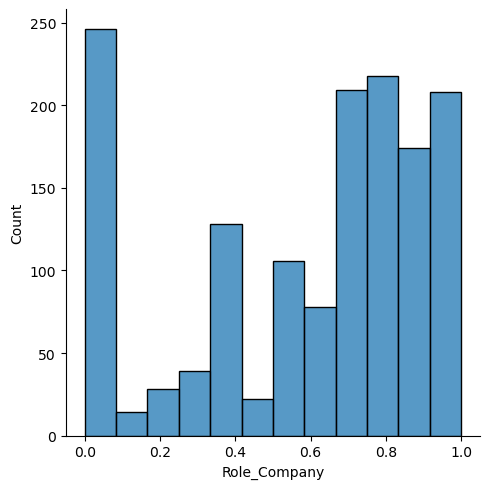

In [26]:
# displot : 데이터의 분포를 시각화 하는데 사용
# 히스토그램과 커널 밀도 추정(KDE)을 함께 그려서 데이터의 분포를 나타낸다

sns.displot(data['Role_Company'])

In [27]:
# 구간화 작업
data['Role_Company_gp'] = np.where(data['Role_Company'] <= 0.3, '0.3 이하',
                                  np.where(data['Role_Company'] <= 0.6, '0.3~0.6', '0.6 초과'))

data[['Role_Company', 'Role_Company_gp']]

,Role_Company,Role_Company_gp
0,0.666667,0.6 초과
1,0.700000,0.6 초과
2,0.000000,0.3 이하
3,0.875000,0.6 초과
4,1.000000,0.6 초과
...,...,...
1465,0.400000,0.3~0.6
1466,1.000000,0.6 초과
1467,0.333333,0.3~0.6
1468,0.666667,0.6 초과


In [28]:
print(data['Role_Company_gp'].value_counts())

Role_Company_gp
0.6 초과     826
0.3 이하     323
0.3~0.6    321
Name: count, dtype: int64


In [29]:
# 근속년도 대비 동일업무 진행 비율 별 이직률 현황
df_gp = data.groupby(['Role_Company_gp'])['Attrition'].agg(['count', 'sum'])
df_gp['radio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

# 근속년도 대비 같은 일을 오래 한 경유 이직률이 낮다

,count,sum,radio
Role_Company_gp,,,
0.3 이하,323,89,27.6
0.3~0.6,321,38,11.8
0.6 초과,826,110,13.3


### 가설 설정
#### 야근과 연봉 인상률과 이직에 대한 관계
- 야근을 많이 해도 연봉 인상률이 높다면 이직을 안 할 것이다

In [31]:
# 야근 여부에 따른 이직률 현황

df_gp = data.groupby(['OverTime'])['Attrition'].agg(['count', 'sum'])
df_gp['radio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

# 야근을 안 할수록 이직률이 낮다

,count,sum,radio
OverTime,,,
No,1054,110,10.4
Yes,416,127,30.5


In [32]:
# 전체 평균 대비 이직률 확인해 보기

df_gp_plot = df_gp.reset_index()
df_gp_plot = df_gp_plot[df_gp_plot['OverTime'] == 'No']
print(f'야근이 없는 직원의 이직률 : {df_gp_plot['radio'].mean()}%')
 

# 전체 이직률 평균은 원래 16%였음
# 야근이 없는 직원은 10.4% 이므로, 전체 평균대비 낮은 이직률을 보임

야근이 없는 직원의 이직률 : 10.4%


In [33]:
# PercentSalaryHike : 연봉 인상률
data['PercentSalaryHike']

df_gp = data.groupby(['OverTime', 'PercentSalaryHike'])['Attrition'].agg(['count', 'sum'])
df_gp['radio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp


# 야근을 하지 않는 직원들은 연봉 상승률과 관계없이 전체 평균보다 낮은 이직률을 가지고 있다
# 야근을 많이 하는 직원일수록 이직률은 높다..
# 연봉 20% 상승률 까지는 이직률이 감소하는 것 처럼 보이나, 21%에서 상승하는 '핵심' 인재의 경우 바로 이직률이 상상하는 모습을 볼 수 있다.

count  sum  radio
OverTime PercentSalaryHike                   
No       11                   149   19   12.8
         12                   139   18   12.9
         13                   144   14    9.7
         14                   145    8    5.5
         15                    80   12   15.0
         16                    55    8   14.5
         17                    66    9   13.6
         18                    60    5    8.3
         19                    55    3    5.5
         20                    40    4   10.0
         21                    36    2    5.6
         22                    41    6   14.6
         23                    19    1    5.3
         24                    12    1    8.3
         25                    13    0    0.0
Yes      11                    61   22   36.1
         12                    59   15   25.4
         13                    65   20   30.8
         14                    56   16   28.6
         15                    21    6   28.6
         16                    23    6   26.1
         17                    16    5   31.2
         18                    29    8   27.6
         19                    21    6   28.6
         20                    15    3   20.0
         21                    12    3   25.0
         22                    15    6   40.0
         23                     9    5   55.6
         24                     9    5   55.6
         25                     5    1   20.0

In [34]:
# 전체 평균 대비 이직률 확인해 보기

df_gp_plot_1 = df_gp.reset_index()
df_gp_plot_1 = df_gp_plot_1[df_gp_plot_1['OverTime'] == 'Yes']
print(f'야근이 없는 직원의 이직률 : {df_gp_plot_1['radio'].mean()}%')
 

# 전체 이직률 평균은 원래 16%였음
# 야근을 하는 직원일 수록 이직률이 높다

야근이 없는 직원의 이직률 : 31.94666666666667%


#### 가설 검증 정리
- 야근과 연봉상승 폭에 대한 가설 정리
- 야근을 하지않은 직원은 일반적으로 이직률이 낮다
- 야근을 하는 직원은 대게 이직률이 높다
- 특히 연봉 인상폭이 21%인 핵심직원은 이직기회가 생긴다 하면 바로 이직을 할 수 있따
- 연봉 인상률이 높은 직원의 야근시간을 줄인 것이 핵심 인재의 이탈 방지에 중요

## 모델 학습을 위한 준비
1. 데이터 타입 확인

In [37]:
df = data
for i in data.columns :
    print(df[i].dtypes, df[i].dtypes == 'O')
    # 대문자 'O'는 object 형일 때 True출력

int64 False
int32 False
object True
int64 False
object True
int64 False
int64 False
object True
int64 False
int64 False
int64 False
object True
int64 False
int64 False
int64 False
object True
int64 False
object True
int64 False
int64 False
int64 False
object True
object True
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
int64 False
object True
float64 False
object True


In [38]:
# 데이터 분할
# 수치형 데이터, 범주형 데이터 분리

numeric_list = []
categorical_list = []

for i  in df.columns :
    if(df[i].dtypes == 'O') :
        categorical_list.append(i)
    else:
        numeric_list.append(i)

print(f'categorical_list : {categorical_list}')
print(end = '\n\n')
print(f'numeric_list : {numeric_list}')

categorical_list : ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime', 'Age_gp', 'Role_Company_gp']


numeric_list : ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Role_Company']


In [39]:
# 모델링을 진행하기 위한 X 데이터와 y 데이터를 구분허기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [40]:
X = data.drop(['Age_gp', 'Role_Company_gp', 'Role_Company', 'Attrition'], axis = 1)
y = df['Attrition']
 

In [41]:
for i in range(len(X.columns)) :
    i = i + 1
print(i)

34


In [42]:
# 출장이 이직에 영향을 미칠까?
# 출장이 많으면 이직률이 높지 않을까?? 
X['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [43]:
X['BusinessTravel'].value_counts()
# 데이터가 한쪽(종종 출장)으로 너무 쏠려 있어서 활용이 어려워 보임

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [44]:
# 라벨인코딩 실습 해보기
bt_dict = {
        'Non-Travel' : 0, 
        'Travel_Rarely' : 1, 
        'Travel_Frequently' : 2
          }

In [45]:
X['BusinessTravel'] = X['BusinessTravel'].map(bt_dict)

In [46]:
X['BusinessTravel']

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: BusinessTravel, Length: 1470, dtype: int64

In [47]:
X['BusinessTravel'].value_counts()

BusinessTravel
1    1043
2     277
0     150
Name: count, dtype: int64

In [48]:
# 남은 컬럼은 원핫 인코딩을 진행해 보기
X_one_hot = pd.get_dummies(X, dtype = int)
X_one_hot

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,1,0,0,0,1,1,0,1
1,49,2,279,8,1,1,2,3,61,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,...,0,0,0,0,0,0,1,1,0,1
3,33,2,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,1,0,1,0,1
4,27,1,591,2,1,1,7,1,40,3,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,23,2,1,2061,3,41,4,...,0,0,0,0,0,1,0,1,1,0
1466,39,1,613,6,1,1,2062,4,42,2,...,0,0,0,0,0,1,0,1,1,0
1467,27,1,155,4,3,1,2064,2,87,4,...,0,0,0,0,0,1,0,1,0,1
1468,49,2,1023,2,3,1,2065,4,63,2,...,0,0,1,0,0,1,0,1,1,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X_one_hot, 
    y, 
    train_size = 0.7, 
    random_state = 12, 
    stratify = y
    # stratify ?? : 정답 클래스의 비율을 맞춰주는 옵션(값이 한쪽으로 쏠리지 않도록 하는 것)
)

In [50]:
model = LogisticRegression()

# penalty : 규제(L1, L2)
# C : 규제의 강도(값이 크면 규제는 약해짐, C값이 작아지면 규제는 강해짐.)
# max_iter : 최대 반복 횟수 : 잘 만들어진 시그모이드 곡선을 찾기 위해 여러번 학습을 하겠다. (최대 100회임)

In [51]:
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val_score(model, X_train, y_train, cv = 5).mean()

0.8406251479990529

In [54]:
# 평가 결과 확인하기
model.score(X_test, y_test)

0.8367346938775511

In [55]:
# 분류 보고서 확인
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
mt_train = metrics.classification_report(y_train, pred_train)
mt_test = metrics.classification_report(y_test, pred_test)
print(mt_train)
print(mt_test)

# 훈련 데이터와 평가 데이터의 성능의 차이가 거의 비슷하게 나옴. 일반화가 잘 됨.
# 성능이 괜찮은 모델

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       863
           1       1.00      0.01      0.02       166

    accuracy                           0.84      1029
   macro avg       0.92      0.51      0.47      1029
weighted avg       0.87      0.84      0.77      1029

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.76       441



In [56]:
# 가장 많은 영향을 주는 변수를 탐색

importance_values = model.coef_[0]
importances = pd.Series(importance_values, index = X_train.columns)
top10 = importances.sort_values(ascending = False)[:10]
top10

DistanceFromHome                0.026478
StandardHours                   0.013971
YearsSinceLastPromotion         0.008949
OverTime_Yes                    0.008568
NumCompaniesWorked              0.008244
MaritalStatus_Single            0.006174
BusinessTravel                  0.005635
Department_Sales                0.003727
JobRole_Sales Representative    0.002755
PercentSalaryHike               0.002335
dtype: float64

In [57]:
# 전체 모델의 특성값
len(model.coef_[0])
# 52개

53

In [58]:
# 모델의 특성값 합
model.coef_[0].sum()
# -0.1074282238329515

-0.1074282238329515

In [59]:
top10

DistanceFromHome                0.026478
StandardHours                   0.013971
YearsSinceLastPromotion         0.008949
OverTime_Yes                    0.008568
NumCompaniesWorked              0.008244
MaritalStatus_Single            0.006174
BusinessTravel                  0.005635
Department_Sales                0.003727
JobRole_Sales Representative    0.002755
PercentSalaryHike               0.002335
dtype: float64

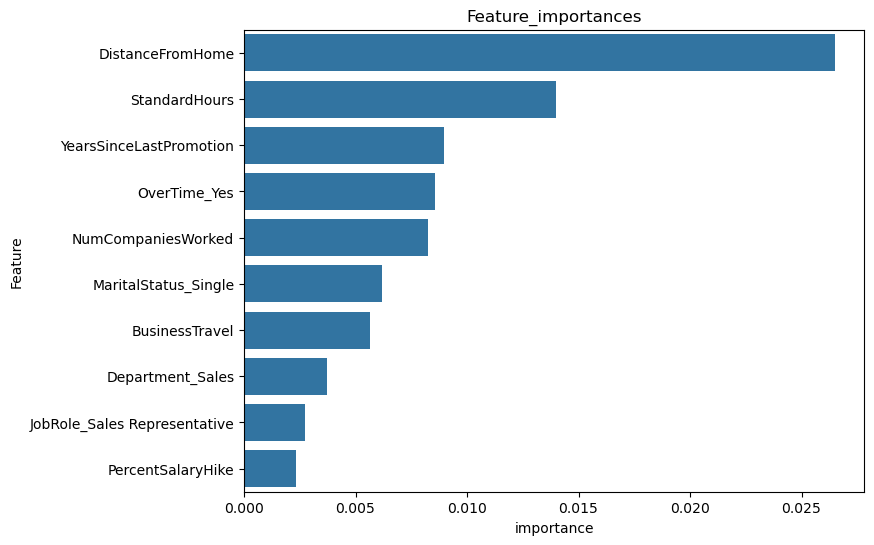

In [60]:
plt.figure(figsize = (8, 6))

plt.title('Feature_importances')
plt.xlabel('importance')
plt.ylabel('Feature')

sns.barplot( x = top10, y = top10.index)

plt.show()

In [61]:
data['MaritalStatus'].unique()
# 'Single', 'Married', 'Divorced'

array(['Single', 'Married', 'Divorced'], dtype=object)

In [62]:
# 최종 추가 가설을 하나 더 분석
# 결혼여부에 따른 이직률 비교

df_ma = data[['MaritalStatus', 'Attrition']].groupby('MaritalStatus')['Attrition'].agg(['count', 'sum'])
df_ma['ratio'] = round(df_ma['sum'] / df_ma['count'] * 100, 1)
df_ma

# 싱글들의 이직률이 상대적으로 높은 편

# 솔류션 도출 : 직원들의 이직률을 낮추려면 결혼을 시킨다

,count,sum,ratio
MaritalStatus,,,
Divorced,327,33,10.1
Married,673,84,12.5
Single,470,120,25.5


In [67]:
# data.info()

In [75]:
import pickle
import joblib
# 모델 저장
model_url = './logi_model.pkl'
# 학습된 상태 그래도 유지하기 위한 dump
joblib.dump(model, model_url)

['./logi_model.pkl']

In [85]:
`

불러온 모델의 점수 : 0.8367346938775511
